# Métodos numéricos
## Tarea 8
**Nombre:** Luis Enrique Pérez Señalin

In [14]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import funciones

### Ejercicio 1

In [4]:
# Leer los datos de 1.csv para el ejercicio 1
filename = './datos/1.csv'
df1 = pd.read_csv(filename)

In [12]:
df1

,x,y
0,4.0,102.56
1,4.2,130.11
2,4.5,113.18
3,4.7,142.05
4,5.1,167.53
5,5.5,195.14
6,5.9,224.87
7,6.3,256.73
8,6.8,299.50
9,7.1,326.72


In [19]:
#a
# Sumatorias necesarias
x_sum = funciones.sumatoria(df1['x'])
y_sum = funciones.sumatoria(df1['y'])
xy_sum = funciones.sumatoria(df1['x'] * df1['y'])
x2_sum = funciones.sumatoria(df1['x'] ** 2)

# Número de puntos
n = len(df1)

# Definimos las incógnitas
b0, b1 = sp.symbols('b0 b1')

# Definimos las dos ecuaciones basadas en la minimización de errores
eq1 = sp.Eq(n * b0 + b1 * x_sum, y_sum)
eq2 = sp.Eq(b0 * x_sum + b1 * x2_sum, xy_sum)

# Resolvemos el sistema de ecuaciones
solution = sp.solve((eq1, eq2), (b0, b1))

solution

{b0: -191.572418526473, b1: 71.6102437202353}

In [24]:
#B
# Sumatorias necesarias
x3_sum = funciones.sumatoria(df1['x'] ** 3)
x4_sum = funciones.sumatoria(df1['x'] ** 4)
x2y_sum = funciones.sumatoria(df1['x'] * df1['y'])

# Definimos las incógnitas
a, b, c = sp.symbols('a b c')

# Definimos las dos ecuaciones basadas en la minimización de errores
eq1 = sp.Eq(a * x2_sum + b * x_sum + c * n, y_sum)
eq2 = sp.Eq(a * x3_sum + b * x2_sum  + c * x_sum, xy_sum)
eq3 = sp.Eq(a * x4_sum + b * x3_sum  + c * x2_sum, x2y_sum)

# Resolvemos el sistema de ecuaciones
solution = sp.solve((eq1, eq2, eq3), (a, b, c))

solution

{a: -7526.93167807447, b: 83354.3083630488, c: -222391.389062993}

**A.** Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

Mínimos cuadrádos: <br>
$m = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^2}) - (\sum{x})^2}$

### Ejercicio 3

In [6]:
# Leer los datos de 1.csv para el ejercicio 1
filename = './datos/3.csv'
df3 = pd.read_csv(filename)
x_true = df3[['Puntuación ACT']]
y_true = df3[['Promedio de puntos']]
df3

,Puntuación ACT,Promedio de puntos
0,28,3.84
1,25,3.21
2,28,3.23
3,27,3.63
4,28,3.75
5,33,3.20
6,28,3.41
7,29,3.38
8,23,3.53
9,27,2.03


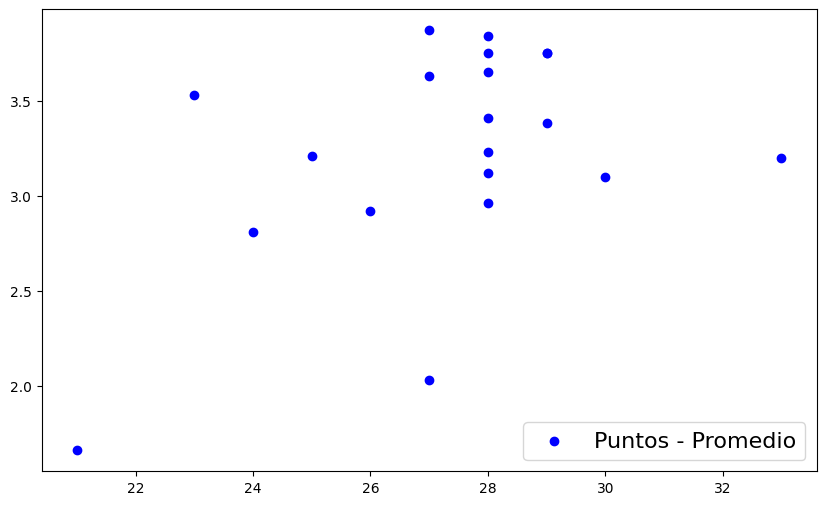

In [7]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

#Ordernar los valores de Puntuación.
df3 = df3.sort_values(by = 'Puntuación ACT')
ax.scatter(x_true, y_true,label = 'Puntos - Promedio',color = 'blue')

ax.legend(loc='lower right',fontsize=16)

In [8]:
# Initialize a Linear Regression model using Sklearn
model = LinearRegression()

# Fit the linear model on the train data
model.fit(x_true, y_true)

B0 = model.intercept_
B1 = model.coef_[0]
print(f'Intercepto: {B0} Pendiente:{B1}')

x_test = np.linspace(x_true.min(),x_true.max(),100)
y_test = model.predict(x_test)


Intercepto: [0.48657566] Pendiente:[0.10085803]


c:\Users\Enrique_P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


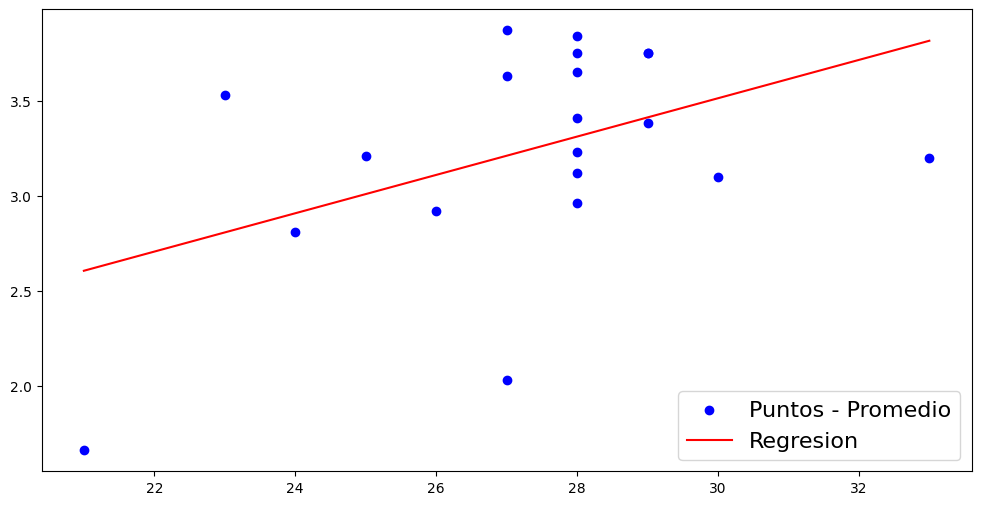

In [9]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_true, y_true,label = 'Puntos - Promedio',color = 'blue')
ax.plot(x_test, y_test,label = 'Regresion',color = 'red')
ax.legend(loc='lower right',fontsize=16)